In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 2.02 ms (started: 2021-09-23 09:56:18 +00:00)


In [ ]:
# Refer https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
# https://www.ritchieng.com/machine-learning-cross-validation/
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# define columns set
cols = ['Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',	 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Inbound', 'Label']
#cols = ['Unnamed: 0','Source Port','Destination Port','Protocol','Flow Duration','Total Fwd Packets','Total Backward Packets','Total Length of Fwd Packets','Fwd Packet Length Max','Fwd Packet Length Std','Flow Bytes/s','Flow Packets/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Min','Fwd Header Length','Bwd Header Length','Bwd Packets/s','Packet Length Std','Packet Length Variance','ACK Flag Count','Avg Fwd Segment Size','Init_Win_bytes_forward','act_data_pkt_fwd','min_seg_size_forward','Inbound','Label']
df = pd.read_csv('/content/drive/MyDrive/ColabFiles/Sample1L/Merged_83.csv', low_memory=False, names=cols, skiprows=1, index_col=None)
# low_memory=True in read_csv leads to non documented, silent errors

# set Features and Label
X = df.drop('Label', axis = 1)
y = df['Label']
print (X.shape, y.shape)
#X = df.iloc[:, 0:80] # read first 80 columns starting index 0
#y = df[['Label']] # read Label

# Normalize X, because of -ve values
scaler = preprocessing.MinMaxScaler()
normalized_X = scaler.fit_transform(X)

labelencoder = preprocessing.LabelEncoder()
y = labelencoder.fit_transform(y)
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

# create an instance of RandomForest Classifier
#scoring1 = ['accuracy','precision_macro', 'recall_macro','f1_macro']
classifier = MultinomialNB()

scoring = {'acc': 'accuracy', 'ps': 'precision_macro', 'rs': 'recall_macro', 'fs': 'f1_macro'}
scores = cross_validate(classifier, normalized_X, y, scoring=scoring, cv=5, return_train_score=True)

print(scores.keys())
print('Accuracy Score: ', scores['test_acc'].mean())
print('Precision Score: ', scores['test_ps'].mean())
print('Recall Score: ', scores['test_rs'].mean())
print('F1 Score: ', scores['test_fs'].mean())



(1309799, 82) (1309799,)
{'BENIGN': 0, 'DNS': 1, 'LDAP': 2, 'MSSQL': 3, 'NTP': 4, 'NetBIOS': 5, 'Portmap': 6, 'SNMP': 7, 'SSDP': 8, 'Syn': 9, 'TFTP': 10, 'UDP': 11, 'UDPLag': 12, 'WebDDoS': 13}
dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_ps', 'train_ps', 'test_rs', 'train_rs', 'test_fs', 'train_fs'])
Accuracy Score:  0.5946080278627431
Precision Score:  0.5369217930971115
Recall Score:  0.5497625958825374
F1 Score:  0.5071656557625488
time: 50.4 s (started: 2021-09-23 09:56:18 +00:00)


In [ ]:
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
ROC_scores = cross_validate(classifier, normalized_X, y, scoring= myscore, cv=5)
print('ROC-AUC Score: ', ROC_scores['test_score'].mean())

ROC-AUC Score:  0.9525097839649886
time: 20.5 s (started: 2021-09-23 09:57:08 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier, normalized_X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[106899      0      0      2    237    137    901      0      0    162
     253    308    460      1]
 [    17   2170  65373     28   1221      0   4917  26265      2      0
       5      0      2      0]
 [     8   1105  73205     52     17      0     20  25587      0      0
       6      0      0      0]
 [     7    250    886  81891    930    223   1305    746   9441      1
       1   4295     24      0]
 [   275    219      0      0  94156      0   5309      0      0      2
      14      0     25      0]
 [     2      1      0    527   6232  60573  32509      3     41      2
       6     30     74      0]
 [    75      3      0    169   8422  31671  59241     33    138      3
     207     25     13      0]
 [    22   3143  19836     11    364   2271   1978  72359      2      0
       6      5      3      0]
 [    16     76    198  37427     25      0     10   1445   5655      1
       4  55141      2      0]
 [   294      0      0      5      0      5      1      1     25  58724
 

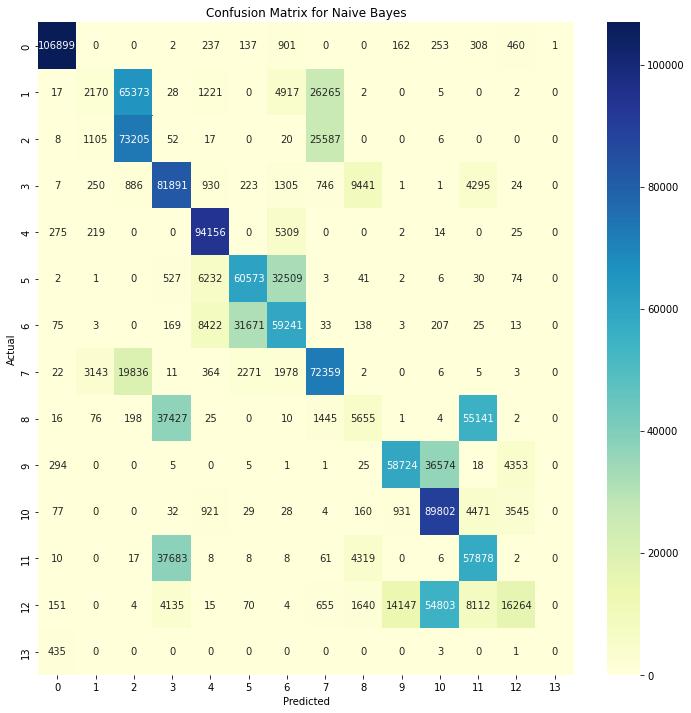

FPR: 
Predicted
0    -1.295709
1    -0.051562
2     1.450192
3     1.292260
4     1.465732
5    -6.864951
6     7.541326
7     2.017747
8    -0.200669
9    -0.585892
10    1.124838
11    2.390945
12   -0.113037
13   -0.002283
dtype: float64
TPR: 
Actual
0     0.977496
1     0.021700
2     0.732050
3     0.818910
4     0.941560
5     0.605730
6     0.592410
7     0.723590
8     0.056550
9     0.587240
10    0.898020
11    0.578780
12    0.162640
13    0.000000
dtype: float64
time: 2.73 s (started: 2021-09-23 09:57:38 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_classes = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(12,12)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y, y_pred, labels=labels)
    #cm_sum = np.sum(cm, axis=1, keepdims=True)
    #cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
          # p = cm_perc[i, j]
            #if i == j:
               # s = cm_sum[i]
               # annot[i, j] = '%d' % (c)
           # elif c == 0:
               # annot[i, j] = ''
            #else:
            annot[i, j] = '%d' % (c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title('Confusion Matrix for Naive Bayes')
    sns.heatmap(cm, annot=annot, cmap='YlGnBu', fmt='', ax=ax)
    filename = '/content/drive/MyDrive/ColabFiles/KFold_5/CM83_NaiveBayes.png'
    plt.savefig(filename)
    plt.show()

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('FPR: ')
    print(FPR)
    print('TPR: ')
    print(TPR)
    #print(classifier.classes_)
cm_analysis(y, y_pred, y_classes, ymap=None, figsize=(12,12))